In [1]:
# importing all libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
# creating a small Linear Regression dataset of 1 input and 1 output
X,Y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=15)

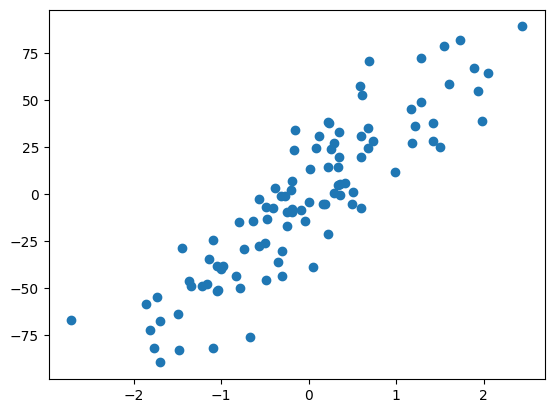

In [3]:
plt.scatter(X,Y)

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)
print(lr.coef_)
print(lr.intercept_)

[36.38789703]
-1.314206623292558


In [5]:
from sklearn.linear_model import Ridge # here we add a factor to the loss function to overcome the overfitting problem

In [6]:
rr1=Ridge(alpha=10)
rr1.fit(X,Y)
print(rr1.coef_)
print(rr1.intercept_)

[33.18423055]
-1.4591030980978121


In [7]:
rr2=Ridge(alpha=100)
rr2.fit(X,Y)
print(rr2.coef_)
print(rr2.intercept_)

[18.51407217]
-2.122609815911366


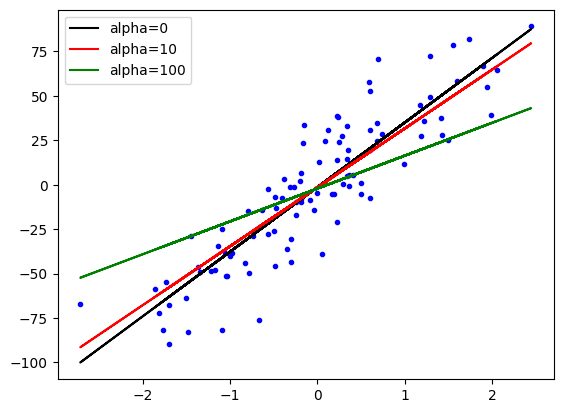

In [8]:
plt.plot(X,Y,'b.')
plt.plot(X,lr.predict(X),color='black',label='alpha=0')
plt.plot(X,rr1.predict(X),color='red',label='alpha=10')
plt.plot(X,rr2.predict(X),color='green',label='alpha=100')
plt.legend()

In [ ]:
# here we can see that as we increase the value of alpha the coeff value are decreasing but it will never be 0

# My Ridge Regression

In [9]:
class MyRidge:
    
    def __init__(self,alpha=10):
#       initializing m and b to none
        self.m = None
        self.b = None
        self.alpha=alpha
        
    def fit(self,X_train,y_train):
#       here we have to calculate m and b value using OLS(Ordinary Least Square method) 
#       where b = Y(mean) - mX(mean) and 
#       m = (sum) (X-X(mean))*(Y-Y(mean)) / (X-X(mean))^2 + alpha
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean())) # (X-X(mean))*(Y-Y(mean))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())) # (X-X(mean))^2
        
        self.m = num/(den+self.alpha) # now adding the factor
#       as here alpha is added in the denominator part so here the coeff can never be 0 , can be close to 0
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
#         print(X_test)
        
        return self.m * X_test + self.b # calculating Y = mX + b

In [10]:
mr=MyRidge()

In [11]:
mr.fit(X,Y)

[33.18423055]
[-1.4591031]


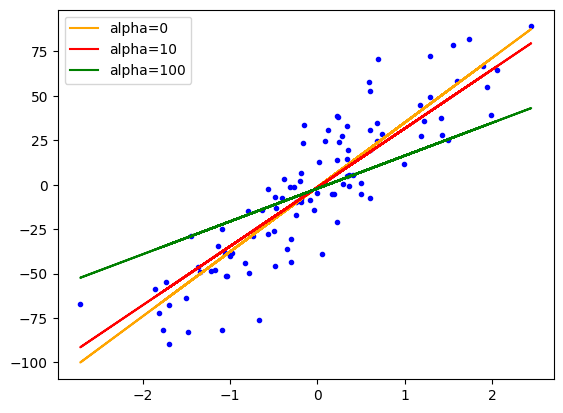

In [12]:
plt.plot(X,Y,'b.')
plt.plot(X,lr.predict(X),color='orange',label='alpha=0')
# plt.plot(X,mr.predict(X),color='black',label='alpha=10MR')
plt.plot(X,rr1.predict(X),color='red',label='alpha=10')
plt.plot(X,rr2.predict(X),color='green',label='alpha=100')
plt.legend()

# My Ridge Regression (for nd dataset)

In [13]:
class MyRidgend:
    
    def __init__(self,alpha=10):
#       initializing m and b to none
        self.m = None
        self.b = None
        self.alpha=alpha
        
    def fit(self,X_train,y_train):
#       here we have to calculate all beta values for n-d dataset
#       here we can write --> Y_pred = X * beta (in matrix form)
#       and loss function E = (e^T * e) + alpha * (beta)^2...... where e = Y - Y_pred
#       after calculating dE/d(beta) we get beta = [((X^T * X) + (alpha * I)) ^-1]* X^T * Y

        X_train=np.insert(X_train,0,1,axis=1) # inserting all 1 at 0th column
        I=np.identity(X_train.shape[1]) # creating Identity Matrix 
        I[0][0]=0 # biasing term = 0
        
        # calculating coeffs
        betas=np.linalg.inv(np.dot(X_train.T,X_train)+ self.alpha*I).dot(X_train.T).dot(y_train) # [((X^T * X) + (alpha * I)) ^-1]* X^T * Y
        self.b=betas[0] # first value of the matrix is intercept beta_0
        self.m=betas[1:] # rest values are coeff
    
    def predict(self,X_test):
        y_pred=np.dot(X_test,self.m)+self.b # calculating Y = mX + b
        return y_pred

In [14]:
X,Y=load_diabetes(return_X_y=True)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
rr=Ridge(alpha=0.1,solver='cholesky') # solver = cholesky as it uses n-d dataset problem

In [17]:
rr.fit(X_train,Y_train)
print(rr.coef_)
print(rr.intercept_)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.92546856900984


In [18]:
Y_pred=rr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.45199494197195456

In [20]:
myRr=MyRidgend(alpha=0.1)

In [21]:
myRr.fit(X_train,Y_train)

In [22]:
print(myRr.m)
print(myRr.b)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.9254685690099


In [23]:
Y_pred1=myRr.predict(X_test)
r2_score(Y_test,Y_pred1)

0.45199494197195467